In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import warnings
import numpy as np
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
json_file = open('demo.json', encoding="utf8")
data = json.load(json_file)

directory = os.fsencode("eduproject_data")
df_data_list = []
df_users_list = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".json"):
        json_file = open(os.path.join(directory.decode("utf-8"), str(filename)), encoding="utf8")
        data = json.load(json_file)
        df_data = pd.DataFrame(data['data'])
        df_users = pd.DataFrame(data['includes']['users'])
        df_data_list.append(df_data)
        df_users_list.append(df_users)
df_data_all = pd.concat(df_data_list, ignore_index=True)
df_users_all = pd.concat(df_users_list, ignore_index=True)
df_all = pd.merge(df_data_all,df_users_all, left_on='author_id', right_on='id', how='left')

Text(0.5, 0, 'dates')

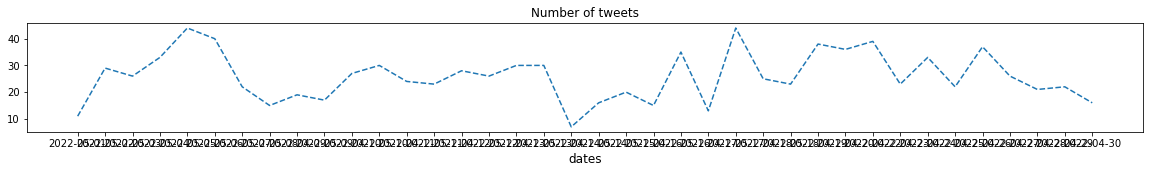

In [2]:
#Tweets per day (time series)
dates = [x.split('T')[0] for x in list(df_data_all.created_at)]
from collections import Counter
dates = dict(Counter(dates))
dates_x = dates.keys()
dates_y = dates.values()
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
plt.plot_date(dates_x, dates_y, '--')
plt.title('Number of tweets')
plt.xlabel('dates', fontsize = 12)

In [5]:
#Tweets per person ranking
#First we remove duplicates by id_x and conversation_id
#df_all['username'].value_counts().head(30)
df_all_no_duplicates = df_all.drop_duplicates(subset=["conversation_id","id_x"])
df_all_no_duplicates['username'].value_counts().head(30)

llume38            120
srviruel            45
ladeidiomas         33
edpuzzle_es         26
agr_psp_iplacex     25
abeorquin           24
vicentgadea         19
ProfeCarlos67       19
123eraseunavez      18
imgende             18
rosaliarte          17
manueljesusF        15
area44cp            13
asunflowers         13
Paulaticher         12
EliaZapico          12
JUNIOResp_es        11
educahistoria       10
miguealvm           10
GoldenmacEDU         9
Hiperdocumentos      9
UtopoLibre           8
genially_es          8
TeamsUniverse        7
VictorArufe          7
daltonicoprofe       7
gustavolorente1      6
teachandbytes        5
Mariaglezben         5
mapiteaching         5
Name: username, dtype: int64

In [7]:
#Retweets per person ranking


In [ ]:
#Likes per person ranking

In [88]:
#Number and name of related hashtags
hashtags=df_all_no_duplicates["entities"].apply(lambda x: x.get('hashtags', None))
hashtags_df = pd.DataFrame.from_dict(hashtags)
hashtags_df = [[d.get("tag") for d in x] for x in hashtags_df["entities"]]
hashtags_all = sum(hashtags_df, [])
hashtag_count = pd.DataFrame(hashtags_all)
hashtag_count = hashtag_count.value_counts()
hashtag_count.head(30)

claustrovirtual       871
ClaustroVirtual       103
educacion              79
educación              56
docentes               47
maestros               33
psicopedagogia         32
mfltwitterati          31
profesores             31
maestro                31
edutwitter             30
edtech                 30
docente                29
profesor               29
psicopedagogía         29
pedagogia              29
pedagogía              29
ENSEnandoConTIC        26
edchats                25
teacher5oclockclub     25
edurecetas             23
teachers               22
edpuzzle               21
ABJ                    21
edufis                 21
inclusioneducativa     20
hashtags               18
MicrosoftEDU           18
podcast                17
unitedteachers         17
dtype: int64

In [128]:
#More retweeted tweets
#TO-DO: How to add the text & username for each of the tweets displayed?
ptweets = df_all_no_duplicates['public_metrics'].apply(lambda x: x.get('retweet_count', None))
ptweets= pd.DataFrame(ptweets)
ptweets_ordered = ptweets.sort_values(by="public_metrics", ascending=False)
ptweets_ordered.head(30)

,public_metrics
8422,89
5995,67
3973,60
6816,34
10719,33
3158,32
4407,29
3281,26
8288,24
9190,23


In [ ]:
#Data export
df_all.to_csv("table_2205.csv", encoding="utf-8")